https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
xls = pd.ExcelFile('FirstGrowth_SecondWines.xlsx')
wine_name = xls.sheet_names
code_name = ['wine'+str(i) for i in range(11)]
for i,val in enumerate(wine_name):
    code_name[i] = pd.read_excel(xls,val )

In [3]:
def file_formatting(sheet):
    #deep copy
    wine = sheet.copy()
    vintage = wine.pop('Vintage')
    release_date =  wine.pop('Release Date')
    date = wine.columns
    wine = wine.T
    wine.columns = vintage
    wine.index = pd.to_datetime(wine.index)
    
    return vintage, release_date , wine

In [4]:
wine_list = []
vintage_list = []
for i in range(len(code_name)-1):
    vintage, release_date , wine = file_formatting(code_name[i])
    vintage_list.append(list(zip(vintage,release_date)))
    wine_list.append(wine)

In [5]:
wine_list[1][2007].tail()

2019-03-31    2820.0
2019-04-30    2820.0
2019-05-31    2820.0
2019-06-30    2820.0
2019-07-31    2820.0
Name: 2007, dtype: float64

In [25]:
vintage_list[0]

[(2007, Timestamp('2008-06-30 00:00:00')),
 (2008, Timestamp('2009-04-30 00:00:00')),
 (2009, Timestamp('2010-06-30 00:00:00')),
 (2010, Timestamp('2011-07-31 00:00:00')),
 (2011, Timestamp('2012-04-30 00:00:00')),
 (2012, Timestamp('2013-04-30 00:00:00')),
 (2013, Timestamp('2014-04-30 00:00:00')),
 (2014, Timestamp('2015-05-31 00:00:00')),
 (2015, Timestamp('2016-06-30 00:00:00')),
 (2016, Timestamp('2017-06-30 00:00:00')),
 (2017, Timestamp('2018-06-30 00:00:00'))]

In [ ]:
def plot_check_graph():
    plt.plot(wine_list[1][2007])
    plt.plot(wine_list[1][2008])
    plt.show()

In [ ]:
plot_check_graph()

In [58]:
from pandas.tools.plotting import autocorrelation_plot

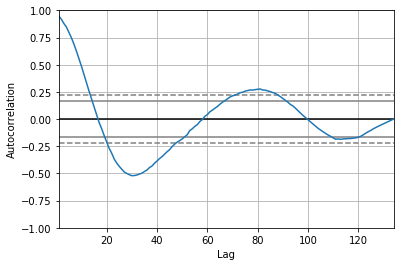

In [59]:
autocorrelation_plot(wine_list[1][2007])
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
 
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

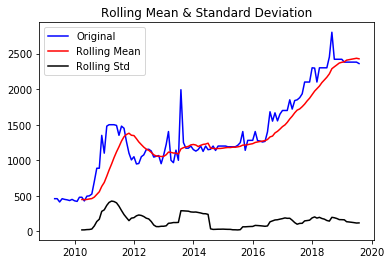

Results of Dickey-Fuller Test:
Test Statistic                  -0.930695
p-value                          0.777696
#Lags Used                       1.000000
Number of Observations Used    122.000000
Critical Value (1%)             -3.485122
Critical Value (5%)             -2.885538
Critical Value (10%)            -2.579569
dtype: float64


In [70]:
test_stationarity(wine_list[3][2008].dropna())

In [ ]:
test_stationarity(wine_list[3][2007].loc['2012-05-31':])

In [ ]:
test_stationarity(wine) #wine_list[3][2011] dropna

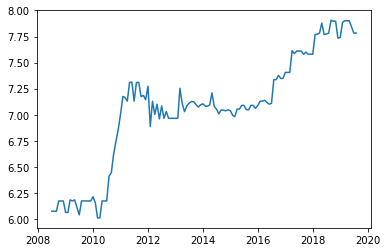

In [67]:
# wine = wine_list[3][2011]
ts_log = np.log(wine_list[3][2007])
plt.plot(ts_log)

In [ ]:
#加权移动平均法
expwighted_avg = ts_log.ewm(halflife=6).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [ ]:
moving_avg = ts_log.rolling(6).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

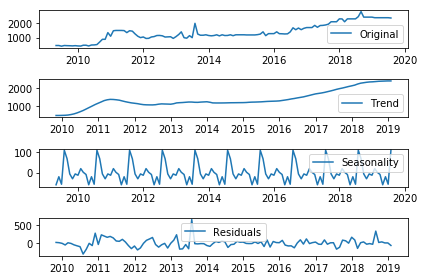

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_log = wine_list[3][2008].dropna()
decomposition = seasonal_decompose(ts_log)
 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
 
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [79]:
def train_test_split(data):
    train = data[:100]
    test = data[100:]
    return train, test
train, test = train_test_split(wine_list[3][2007])

In [82]:
test

2016-10-31    1554.0
2016-11-30    1554.0
2016-12-31    1646.0
2017-01-31    1646.0
2017-02-28    1646.0
2017-03-31    2028.0
2017-04-30    1972.0
2017-05-31    2020.0
2017-06-30    2020.0
2017-07-31    2020.0
2017-08-31    1960.0
2017-09-30    2000.0
2017-10-31    1960.0
2017-11-30    1960.0
2017-12-31    1960.0
2018-01-31    2368.0
2018-02-28    2374.0
2018-03-31    2400.0
2018-04-30    2642.0
2018-05-31    2368.0
2018-06-30    2378.0
2018-07-31    2398.0
2018-08-31    2714.0
2018-09-30    2690.0
2018-10-31    2690.0
2018-11-30    2286.0
2018-12-31    2300.0
2019-01-31    2662.0
2019-02-28    2700.0
2019-03-31    2700.0
2019-04-30    2700.0
2019-05-31    2540.0
2019-06-30    2400.0
2019-07-31    2400.0
Name: 2007, dtype: float64

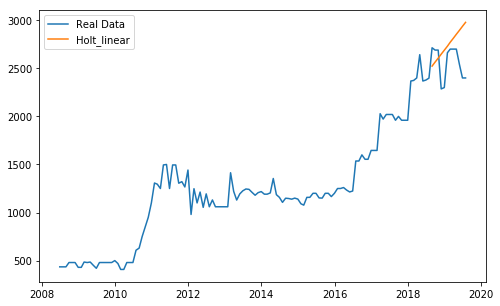

In [154]:
from statsmodels.tsa.api import Holt
 
y_hat_avg = test.copy()
 
fit = Holt(np.asarray(train)).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit.forecast(len(test))
ouput = pd.DataFrame(y_hat_avg['Holt_linear'],index = test.index)

plt.figure(figsize=(8, 5))
# plt.plot(train, label='Train')
# plt.plot(test, label='Test')
plt.plot(wine_list[3][2007], label='Real Data')
plt.plot(ouput, label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [155]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rms = sqrt(mean_squared_error(test, ouput))
print(rms)


307.72411764231305


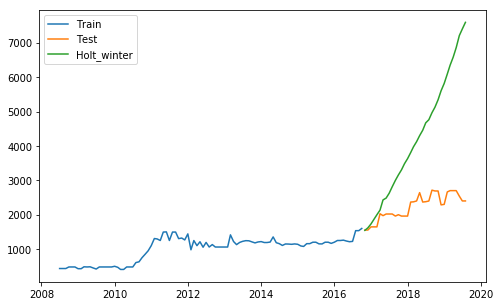

In [110]:
from statsmodels.tsa.api import ExponentialSmoothing
 
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train), seasonal_periods=50, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
ouput = pd.DataFrame(y_hat_avg['Holt_Winter'],index = test.index)

plt.figure(figsize=(8, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(ouput, label='Holt_winter')
plt.legend(loc='best')
plt.show()

## Grid Search

In [6]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [7]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [138]:
def train_test_split(data):
    train = data[:122]
    test = data[122:]
    return train, test
train, test = train_test_split(wine_list[3][2007])

In [139]:
q = d = range(0, 2)
p = range(0, 4)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
#print(pdq)
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print(seasonal_pdq)

In [140]:
def SARIMAX_modeling(data):
    AIC = []
    models = [] 
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit()
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                AIC.append(results.aic)
                models.append([param, param_seasonal])
            except:
                continue
    print('AIC: {} for SARIMAX{}x{}'.format(min(AIC), models[AIC.index(min(AIC))][0],models[AIC.index(min(AIC))][1]))
    return models[AIC.index(min(AIC))][0],models[AIC.index(min(AIC))][1]


In [141]:
param, seasonal_param = SARIMAX_modeling(train)

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2082.1469597764503
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1786.918726337561
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1609.8656081830366
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1445.2392351113824
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1603.7027119446493
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1580.4788842345486
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1458.9940474298241
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1439.8763557786406
ARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:1438.3960891815059
ARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:1430.072505480734
ARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:1260.7298865909072
ARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:1262.7028546923866
ARIMA(0, 0, 0)x(3, 0, 0, 12) - AIC:1240.1153956115004
ARIMA(0, 0, 0)x(3, 0, 1, 12) - AIC:1240.4339792430594
ARIMA(0, 0, 0)x(3, 1, 0, 12) - AIC:1070.497727734123
ARIMA(0, 0, 0)x(3, 1, 1, 12) - AIC:1070.3126044357157
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1926.9484106001964
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1662.7223876094188
ARIMA(0, 0, 1)x(0, 1, 0, 12) - 

ARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:1202.3691191532428
ARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:1065.4983684644385
ARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:1063.8427098525356
ARIMA(2, 0, 1)x(3, 0, 0, 12) - AIC:1044.7351518171938
ARIMA(2, 0, 1)x(3, 0, 1, 12) - AIC:1043.4867800422367
ARIMA(2, 0, 1)x(3, 1, 0, 12) - AIC:901.8568768818136
ARIMA(2, 0, 1)x(3, 1, 1, 12) - AIC:911.1473834421997
ARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1463.8164128478477
ARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1340.3302784376035
ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1394.3091761921844
ARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:1210.319863454251
ARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1328.8795101898745
ARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1330.8788667105653
ARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1217.7380164678289
ARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1199.6701337110849
ARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1191.6762662505314
ARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1191.92127315483
ARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1052.222070296259
ARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC

In [142]:
#ARIMA(0, 1, 0)x(2, 3, 1, 12) - AIC:374.66179047119675
def fit_sarmiax_model(train_data,param, seaonal_param):
    model = sm.tsa.statespace.SARIMAX(train_data,
                                order=param,
                                seasonal_order=seaonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = model.fit()
    print(results.summary())
    return results

In [160]:
#results = fit_sarmiax_model(wine_list[3][2007],param, seaonal_param)
results = fit_sarmiax_model(train,(3, 1, 0), (3, 1, 0, 12))

                                 Statespace Model Results                                 
Dep. Variable:                               2007   No. Observations:                  122
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 12)   Log Likelihood                -432.503
Date:                            Tue, 27 Aug 2019   AIC                            879.006
Time:                                    16:25:16   BIC                            894.746
Sample:                                06-30-2008   HQIC                           885.258
                                     - 07-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3316      0.154     -2.157      0.031      -0.633      -0.030
ar.L2         -0.1119      0.149   

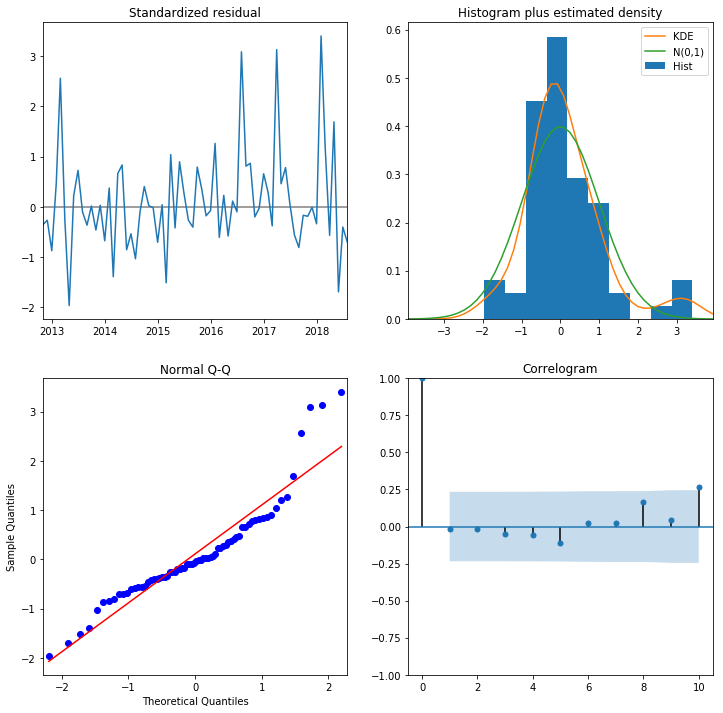

In [144]:
results.plot_diagnostics(figsize=(12, 12))
plt.show()

## Predictions

1-step ahead forecasting implies that each forecasted point is used to predict the following one.

In [123]:
pred0 = results.get_prediction(start='2016-10-31', dynamic=False)
pred0_ci = pred0.conf_int()

dynamic forecasting

In [124]:
pred1 = results.get_prediction(start='2016-10-31', dynamic=True)
pred1_ci = pred1.conf_int()

In [125]:
pred2 = results.get_forecast('2020-01-31')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-03-31':'2020-01-31'])

2019-03-31    1734.858726
2019-04-30    1796.008797
2019-05-31    1755.031018
2019-06-30    1744.860134
2019-07-31    1773.727707
2019-08-31    1793.004203
2019-09-30    1774.484409
2019-10-31    1775.408256
2019-11-30    1777.490986
2019-12-31    1825.029500
2020-01-31    1769.034219
Freq: M, dtype: float64


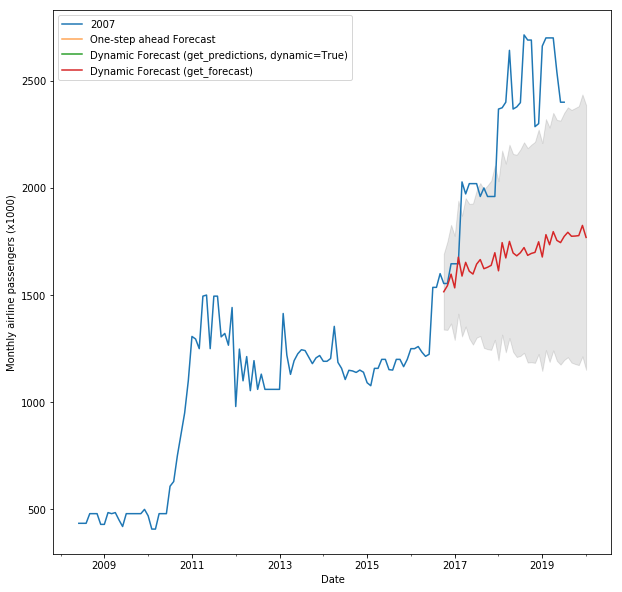

In [126]:
ax = train.plot(figsize=(10, 10))
pred0.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [164]:
output1= results.predict(start="2017-10-31", end="2019-07-31", dynamic=True)

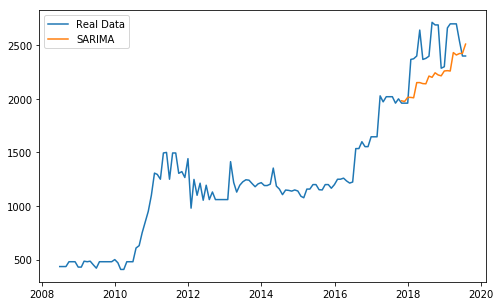

In [162]:
plt.figure(figsize=(8,5))
plt.plot( wine_list[3][2007],label='Real Data')

plt.plot(output, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [170]:
len(test)
len(output1[10:])

12

In [171]:
rms = sqrt(mean_squared_error(test, output1[10:]))
print(rms)

319.26119465357806


In [46]:
pd.plotting.register_matplotlib_converters()

## Evaluation

In [ ]:
prediction = pred2.predicted_mean['1960-01-01':'1960-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100
rmse = np.mean((forecast - actual)**2)**.5  # RMSE
print('The Mean Absolute Percentage Error for the forecast of year 1960 is {:.2f}%'.format(MAPE))